# Import Packages

In [1]:
# built-in modules (no install required)
import os.path

# third-party modules (pip install required)
import pandas as pd
from pymodulon.compare import compare_ica
from pymodulon.core import IcaData
from pymodulon.io import load_json_model, save_to_json
from pymodulon.plotting import *

# Load Data

In [2]:
PRECISE1K_PATH = '../../data/precise1k/'

In [3]:
ica_data = load_json_model(os.path.join(PRECISE1K_PATH, 'precise1k.json.gz'))

# Set iM to Annotate

In [4]:
iM_to_annotate = ica_data.imodulon_names[200]
iM_to_annotate = 'Superoxide'
iM_to_annotate

'Superoxide'

# Plot Gene Weights

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/plotting.py:836: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  mod_cogs = ica_data.gene_table.loc[component_genes].COG


<AxesSubplot:xlabel='Gene Start', ylabel='UC-4 Gene Weight'>

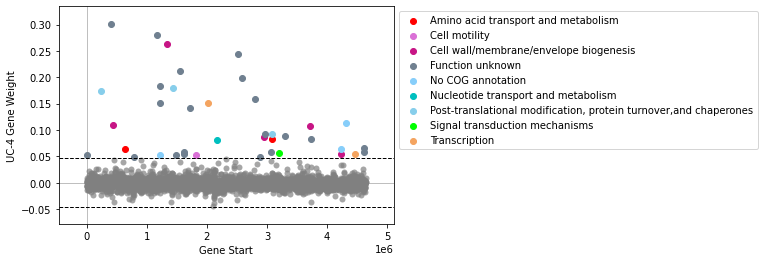

In [10]:
plot_gene_weights(ica_data, iM_to_annotate, adjust_labels=False)

# Display Current Row

In [11]:
ica_data.imodulon_table.loc[iM_to_annotate]

exp_var                                         0.003196
imodulon_size                                         39
enrichment_category                              Unknown
system_category                                  Unknown
functional_category                              Unknown
function                                         Unknown
regulator                                            NaN
n_regs                                               NaN
pvalue                                               NaN
qvalue                                               NaN
f1score                                              NaN
precision                                            NaN
recall                                               NaN
TP                                                   NaN
regulon_size                                         NaN
confidence                                             1
note                              May be related to RcsC
trn_enrich_max_regs            

# Show Genes

In [14]:
imod_genes = ica_data.view_imodulon(iM_to_annotate)
imod_genes['length'] = imod_genes['end'] - imod_genes['start']
imod_genes.sort_values(by='gene_weight', ascending=False)

,gene_weight,gene_name,synonyms,gene_product,COG,regulator,uniprot,start,end,strand,...,k_eff,schmidt_prot_med,heckmann_prot_med,proteomics,p1k,p1k_ctrl_log_tpm,p1k_median_log_tpm,p1k_mad_log_tpm,in_iM,length
b1957,0.140707,yodC,yodC,protein YodC,Function unknown,Lrp,P64517,2028188,2028370,-,...,False,NaN,NaN,False,True,4.362592,5.307671,1.423921,True,182
b1795,0.094883,yeaQ,yeaQ,PF04226 family protein YeaQ,Function unknown,ppGpp,P64485,1879007,1879255,-,...,False,NaN,NaN,False,True,10.064077,8.681532,1.847281,True,248
b0498,0.094216,ybbC,ybbC,PF15631 family protein YbbC,Function unknown,"ppGpp,Nac",P33668,527581,527949,+,...,False,NaN,NaN,False,True,2.513710,3.205271,1.376677,True,368
b4126,0.094071,yjdI,yjdI,PF06902 family protein YjdI,Function unknown,NaN,P0AF59,4351843,4352073,+,...,False,NaN,NaN,False,True,4.829905,4.863425,1.815155,True,230
b4224,0.089313,chpS,chpS;chpBI;yjfB,ChpS antitoxin of the ChpB-ChpS toxin-antitoxi...,Transcription,"RpoD,Nac",P08365,4448447,4448698,+,...,False,NaN,NaN,False,True,4.832264,4.951315,0.845217,True,251
b1559,0.087274,ydfT,quuQ;ydfT,Qin prophage%3B putative antitermination prote...,Transcription,YdcN,P76161,1642489,1643241,-,...,False,NaN,NaN,False,True,2.802926,2.784733,0.778581,True,752
b2377,0.086971,yfdY,yfdY,DUF2545 domain-containing protein YfdY,Function unknown,NaN,P76521,2495050,2495292,-,...,False,NaN,NaN,False,True,5.431116,5.713575,0.963775,True,242
b0119,0.086570,yacL,yacL,UPF0231 family protein YacL,Function unknown,"Lrp,cyaR",P0A8E5,134388,134750,+,...,False,NaN,NaN,False,True,7.107465,6.366924,0.770245,True,362
b0901,0.085466,ycaK,ycaK,putative NAD(P)H-dependent oxidoreductase YcaK,Function unknown,Nac,P43340,949668,950258,+,...,False,NaN,NaN,False,True,2.699318,2.527325,0.973596,True,590
b1952,0.084842,dsrB,dsrB,protein DsrB,Function unknown,NaN,P0AEG8,2024635,2024823,-,...,False,NaN,NaN,False,True,6.167696,6.558575,0.917387,True,188


# Regulatory Enrichment

## Compute TRN Enrichment

In [1246]:
trn_enrichment = ica_data.compute_trn_enrichment(iM_to_annotate, max_regs=3, evidence=[0, 1, 2],
                                                 force=True, method='both')
trn_enrichment

,imodulon,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs


### Update Regulator Row

In [1248]:
ica_data.imodulon_table.loc[
    iM_to_annotate,
    ['regulator', 'pvalue', 'qvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs']
] = None

In [1233]:
ica_data.imodulon_table.loc[
    iM_to_annotate,
    ['regulator', 'pvalue', 'qvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs']
] = trn_enrichment.loc[
    0,
    ['regulator', 'pvalue', 'qvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs']
]

In [1234]:
ica_data.imodulon_table.loc[
    iM_to_annotate,
    [
        'trn_enrich_max_regs',
        'trn_enrich_evidence',
        'trn_enrich_method'
    ]
] = [
    2,
    '[1, 2]',
    'and'
]

## Specific Regulon Enrichment

If the gene list suggests >3 regulators involved simultaneously

In [190]:
iM_to_annotate

'Zinc-2'

In [1278]:
specific_regulon = 'RpoS,Fis,NarP,NarL,AppY,YdeO,ArcA,IscR'.replace(',', '+')
specific_enrichment = ica_data.compute_regulon_enrichment(iM_to_annotate, specific_regulon, evidence=[0, 1, 2])
specific_enrichment

pvalue           0
precision        1
recall           1
f1score          1
TP               6
regulon_size     6
imodulon_size    6
n_regs           8
Name: RpoS+Fis+NarP+NarL+AppY+YdeO+ArcA+IscR, dtype: int64

### Update Regulator Row

In [1279]:
ica_data.imodulon_table.loc[
    iM_to_annotate,
    ['pvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs']
] = specific_enrichment[
    ['pvalue', 'precision', 'recall', 'f1score', 'TP', 'regulon_size', 'n_regs']
]
ica_data.imodulon_table.loc[iM_to_annotate, 'regulator'] = specific_regulon

In [1280]:
ica_data.imodulon_table.loc[iM_to_annotate, 'compute_regulon_evidence'] = '[0, 1, 2]'

# Plot iModulon Activities

<AxesSubplot:ylabel='Uronate iModulon\nActivity'>

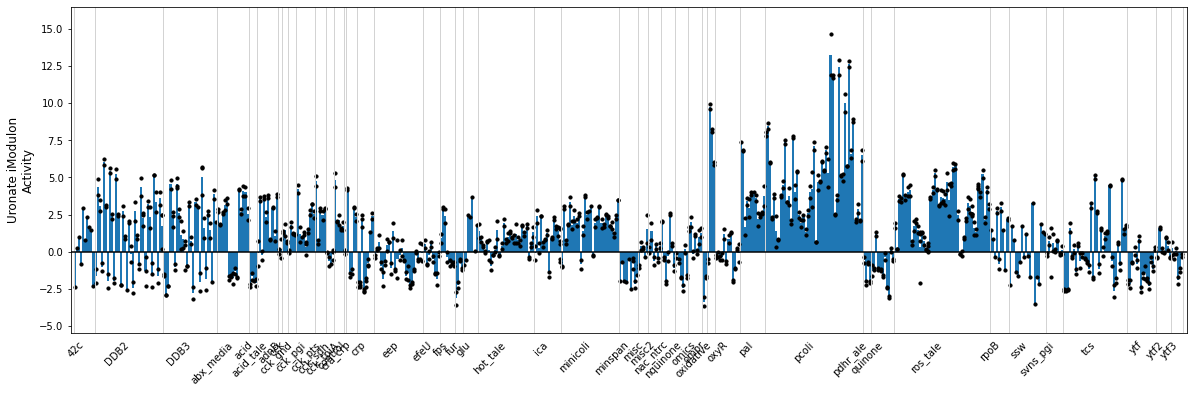

In [1241]:
_, ax = plt.subplots(figsize=(20, 6))
plot_activities(ica_data,iM_to_annotate, ax=ax)

## Specific Project

<AxesSubplot:ylabel='194 iModulon\nActivity'>

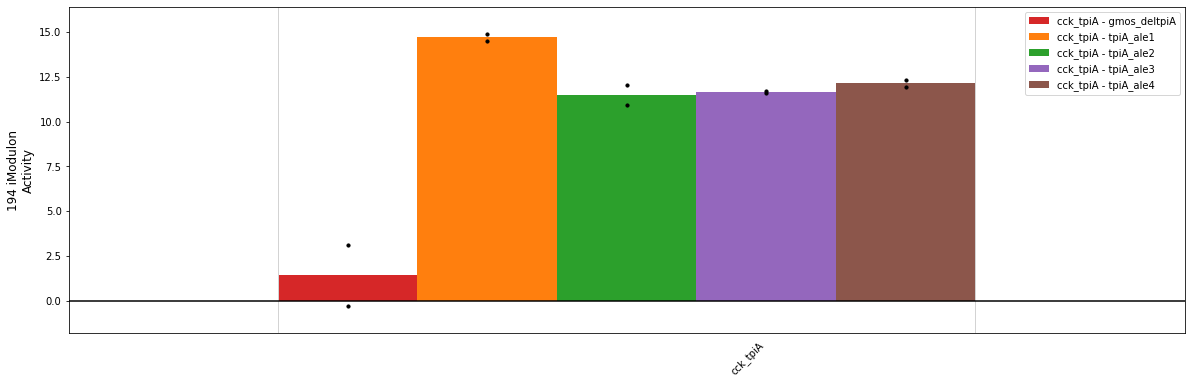

In [1147]:
_, ax = plt.subplots(figsize=(20, 6))
plot_activities(ica_data,iM_to_annotate, projects='cck_tpiA', ax=ax)

## Project Metadata

In [1422]:
ica_data.sample_table[ica_data.sample_table['project'].isin(['minicoli'])].sort_values(by='condition')[[
    'sample_id', 'Strain', 'Base Media', 'Strain Description',
       'Carbon Source (g/L)', 'Nitrogen Source (g/L)', 'Electron Acceptor',
       'Trace Element Mixture', 'Supplement', 'Temperature (C)', 'pH'
]]

,sample_id,Strain,Base Media,Strain Description,Carbon Source (g/L),Nitrogen Source (g/L),Electron Acceptor,Trace Element Mixture,Supplement,Temperature (C),pH
minicoli_042,minicoli__W3110_Fe_starve__1,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minicoli_043,minicoli__W3110_Fe_starve__2,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minicoli_044,minicoli__W3110_LB__1,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minicoli_045,minicoli__W3110_LB__2,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minicoli_047,minicoli__W3110_N_starve__2,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minicoli_046,minicoli__W3110_N_starve__1,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minicoli_059,minicoli__W3110_WT_glc__2,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minicoli_058,minicoli__W3110_WT_glc__1,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minicoli_061,minicoli__W3110_WT_osm__2,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minicoli_060,minicoli__W3110_WT_osm__1,W3110,NaN,Escherichia coli K-12 W3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Category/Function/Confidence

In [1020]:
ica_data.imodulon_table['enrichment_category'].value_counts()

Regulatory    117
Genomic        35
Technical      20
Biological     17
Unknown         7
Name: enrichment_category, dtype: int64

In [1250]:
ica_data.imodulon_table.loc[
    iM_to_annotate,
    [
        'enrichment_category',
        'system_category',
        'functional_category',
        'function',
        'confidence',
        'note'
    ]
] = [
    'Unknown',
    'Unknown',
    'Unknown',
    'Unknown',
    1,
    None
]

# Miscellaneous Fields

In [1207]:
ica_data.imodulon_table.loc[
    iM_to_annotate,
    [
        'single_gene_dominant_technical',
        'regulon_discovery',
        'ko',
        'tcs'
    ]
] = [
    'False',
    'False',
    'False',
    'False'
]

# Update IcaData Object and Tables

## Rename iModulon

In [5]:
iM_to_annotate

'Superoxide'

In [6]:
ica_data.rename_imodulons({iM_to_annotate: 'SoxS'})

In [17]:
sorted([n for n in ica_data.imodulon_names if isinstance(n, str) and 'Fur' in n])

['Fur-1', 'Fur-2']

## Save Tables

In [7]:
ica_data.imodulon_table.to_csv(os.path.join(PRECISE1K_PATH, 'imodulon_table.csv'))
ica_data.A.to_csv(os.path.join(PRECISE1K_PATH, 'A.csv'))
ica_data.M.to_csv(os.path.join(PRECISE1K_PATH, 'M.csv'))
save_to_json(ica_data, os.path.join(PRECISE1K_PATH, 'precise1k'), compress=True)